In [1]:
import matplotlib.pyplot as plt
import numpy as np

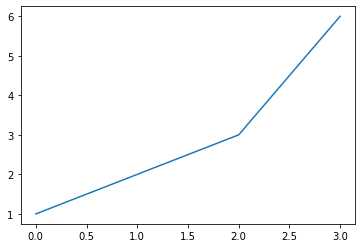

In [2]:
plt.plot([1, 2, 3, 6])

Text(0, 0.5, 'Some numbers')

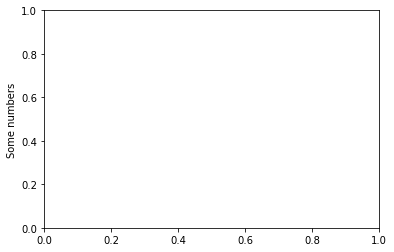

In [3]:
plt.ylabel('Some numbers')

## What are `pyplot.plot`’s function parameters?
---

The documentation is a Markdown doc. I’d like to format the output of `inspect.getdoc` nicely.
Based on [Format output of code cell with Markdown](https://stackoverflow.com/questions/32026727/format-output-of-code-cell-with-markdown).

In [4]:
import inspect
from IPython.display import Markdown, display

display(Markdown(inspect.getdoc(plt.plot)))

Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, color='green', marker='o', linestyle='dashed',
...      linewidth=2, markersize=12)

When conflicting with *fmt*, keyword arguments take precedence.


**Plotting labelled data**

There's a convenient way for plotting objects with labelled data (i.e.
data that can be accessed by index ``obj['y']``). Instead of giving
the data in *x* and *y*, you can provide the object in the *data*
parameter and just give the labels for *x* and *y*::

>>> plot('xlabel', 'ylabel', data=obj)

All indexable objects are supported. This could e.g. be a `dict`, a
`pandas.DataFrame` or a structured numpy array.


**Plotting multiple sets of data**

There are various ways to plot multiple sets of data.

- The most straight forward way is just to call `plot` multiple times.
  Example:

  >>> plot(x1, y1, 'bo')
  >>> plot(x2, y2, 'go')

- Alternatively, if your data is already a 2d array, you can pass it
  directly to *x*, *y*. A separate data set will be drawn for every
  column.

  Example: an array ``a`` where the first column represents the *x*
  values and the other columns are the *y* columns::

  >>> plot(a[0], a[1:])

- The third way is to specify multiple sets of *[x]*, *y*, *[fmt]*
  groups::

  >>> plot(x1, y1, 'g^', x2, y2, 'g-')

  In this case, any additional keyword argument applies to all
  datasets. Also this syntax cannot be combined with the *data*
  parameter.

By default, each line is assigned a different style specified by a
'style cycle'. The *fmt* and line property parameters are only
necessary if you want explicit deviations from these defaults.
Alternatively, you can also change the style cycle using
:rc:`axes.prop_cycle`.


Parameters
----------
x, y : array-like or scalar
    The horizontal / vertical coordinates of the data points.
    *x* values are optional and default to ``range(len(y))``.

    Commonly, these parameters are 1D arrays.

    They can also be scalars, or two-dimensional (in that case, the
    columns represent separate data sets).

    These arguments cannot be passed as keywords.

fmt : str, optional
    A format string, e.g. 'ro' for red circles. See the *Notes*
    section for a full description of the format strings.

    Format strings are just an abbreviation for quickly setting
    basic line properties. All of these and more can also be
    controlled by keyword arguments.

    This argument cannot be passed as keyword.

data : indexable object, optional
    An object with labelled data. If given, provide the label names to
    plot in *x* and *y*.

    .. note::
        Technically there's a slight ambiguity in calls where the
        second label is a valid *fmt*. ``plot('n', 'o', data=obj)``
        could be ``plt(x, y)`` or ``plt(y, fmt)``. In such cases,
        the former interpretation is chosen, but a warning is issued.
        You may suppress the warning by adding an empty format string
        ``plot('n', 'o', '', data=obj)``.

Returns
-------
list of `.Line2D`
    A list of lines representing the plotted data.

Other Parameters
----------------
scalex, scaley : bool, default: True
    These parameters determine if the view limits are adapted to the
    data limits. The values are passed on to `autoscale_view`.

**kwargs : `.Line2D` properties, optional
    *kwargs* are used to specify properties like a line label (for
    auto legends), linewidth, antialiasing, marker face color.
    Example::

    >>> plot([1, 2, 3], [1, 2, 3], 'go-', label='line 1', linewidth=2)
    >>> plot([1, 2, 3], [1, 4, 9], 'rs', label='line 2')

    If you make multiple lines with one plot call, the kwargs
    apply to all those lines.

    Here is a list of available `.Line2D` properties:

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: float or None
    animated: bool
    antialiased or aa: bool
    clip_box: `.Bbox`
    clip_on: bool
    clip_path: Patch or (Path, Transform) or None
    color or c: color
    contains: unknown
    dash_capstyle: {'butt', 'round', 'projecting'}
    dash_joinstyle: {'miter', 'round', 'bevel'}
    dashes: sequence of floats (on/off ink in points) or (None, None)
    data: (2, N) array or two 1D arrays
    drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
    figure: `.Figure`
    fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
    gid: str
    in_layout: bool
    label: object
    linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
    linewidth or lw: float
    marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
    markeredgecolor or mec: color
    markeredgewidth or mew: float
    markerfacecolor or mfc: color
    markerfacecoloralt or mfcalt: color
    markersize or ms: float
    markevery: None or int or (int, int) or slice or List[int] or float or (float, float) or List[bool]
    path_effects: `.AbstractPathEffect`
    picker: unknown
    pickradius: float
    rasterized: bool or None
    sketch_params: (scale: float, length: float, randomness: float)
    snap: bool or None
    solid_capstyle: {'butt', 'round', 'projecting'}
    solid_joinstyle: {'miter', 'round', 'bevel'}
    transform: `matplotlib.transforms.Transform`
    url: str
    visible: bool
    xdata: 1D array
    ydata: 1D array
    zorder: float

See Also
--------
scatter : XY scatter plot with markers of varying size and/or color (
    sometimes also called bubble chart).

Notes
-----
**Format Strings**

A format string consists of a part for color, marker and line::

    fmt = '[marker][line][color]'

Each of them is optional. If not provided, the value from the style
cycle is used. Exception: If ``line`` is given, but no ``marker``,
the data will be a line without markers.

Other combinations such as ``[color][marker][line]`` are also
supported, but note that their parsing may be ambiguous.

**Markers**

=============    ===============================
character        description
=============    ===============================
``'.'``          point marker
``','``          pixel marker
``'o'``          circle marker
``'v'``          triangle_down marker
``'^'``          triangle_up marker
``'<'``          triangle_left marker
``'>'``          triangle_right marker
``'1'``          tri_down marker
``'2'``          tri_up marker
``'3'``          tri_left marker
``'4'``          tri_right marker
``'s'``          square marker
``'p'``          pentagon marker
``'*'``          star marker
``'h'``          hexagon1 marker
``'H'``          hexagon2 marker
``'+'``          plus marker
``'x'``          x marker
``'D'``          diamond marker
``'d'``          thin_diamond marker
``'|'``          vline marker
``'_'``          hline marker
=============    ===============================

**Line Styles**

=============    ===============================
character        description
=============    ===============================
``'-'``          solid line style
``'--'``         dashed line style
``'-.'``         dash-dot line style
``':'``          dotted line style
=============    ===============================

Example format strings::

    'b'    # blue markers with default shape
    'or'   # red circles
    '-g'   # green solid line
    '--'   # dashed line with default color
    '^k:'  # black triangle_up markers connected by a dotted line

**Colors**

The supported color abbreviations are the single letter codes

=============    ===============================
character        color
=============    ===============================
``'b'``          blue
``'g'``          green
``'r'``          red
``'c'``          cyan
``'m'``          magenta
``'y'``          yellow
``'k'``          black
``'w'``          white
=============    ===============================

and the ``'CN'`` colors that index into the default property cycle.

If the color is the only part of the format string, you can
additionally use any  `matplotlib.colors` spec, e.g. full names
(``'green'``) or hex strings (``'#008000'``).

Unfortunately, the above formatted Markdown output is not perfect. Specifically, the Python interpreter prompt lines look off.

But it’s enough to figure out what the function does, and how to use it. And obviously you can always check it out online, which might be easier to process anyway: [`matplotlib.pyplot.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

## Formatting the style of the plot
---

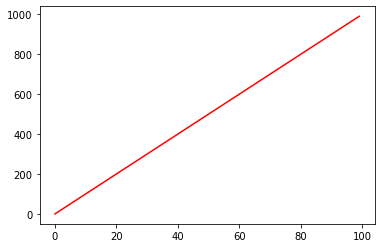

In [5]:
plt.plot(range(0, 1000, 10), 'r')

The `'r'` argument passed to `plot` above is a format string. This format string lets you quickly specify the `[marker][line][color]`. All of these things can be set explicitly with keyword arguments passed to `plot`, too.

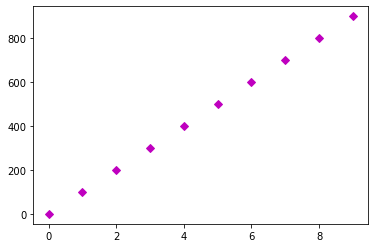

In [6]:
plt.plot(range(0, 1000, 100), 'Dm')

(-1.0, 13.0, -100.0, 1200.0)

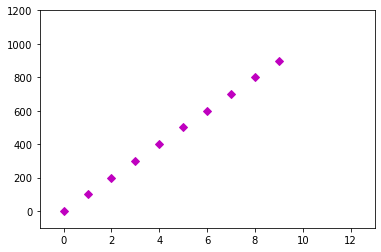

In [7]:
plt.plot(range(0, 1000, 100), marker='D', color='m', linestyle='None')
plt.axis([-1, 13, -100, 1200])

(0.0, 6.0, 0.0, 20.0)

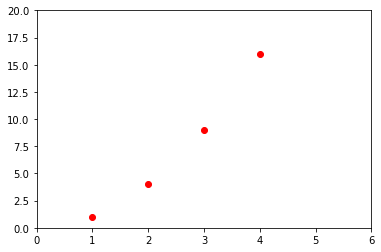

In [8]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])

### Specify multiple sets of `[x]`, `y`, `[fmt]` groups
---

In [9]:
t = np.arange(0., 5., 0.2)

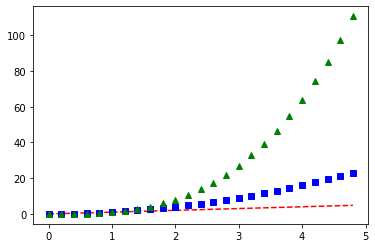

In [10]:
# red dashed, blue squares, and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

### Plotting with keyword strings
---

When creating plots, you can pass in data objects that support key access (for example `data['my_key']`) and membership testing (`'my_key' in data`).

Examples of such objects include Python `dict` objects, [`numpy.recarray`](https://numpy.org/doc/stable/reference/generated/numpy.recarray.html#numpy.recarray), or `pandas.DataFrame`.

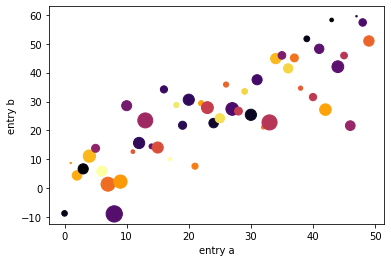

In [11]:
# Prep a data dict
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

# Draw a scatter plot
plt.scatter('a', 'b', c='c', cmap='inferno', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

In [12]:
'd' in data

True

In [13]:
'e' in data

False

### Plotting with categorical variables
---

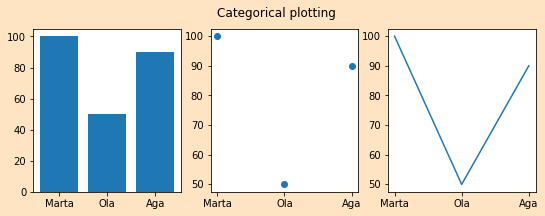

In [14]:
names = ['Marta', 'Ola', 'Aga']
values = [100, 50, 90]

plt.figure(figsize=(9, 3), facecolor='bisque')

plt.subplot(131)
plt.bar(names, values)

plt.subplot(132)
plt.scatter(names, values)

plt.subplot(133)
plt.plot(names, values)

plt.suptitle('Categorical plotting')

# This call is only needed in non-interactive mode
# Jupyter Notebook opens in interactive mode
# Shell Python opens in non-interactive mode
plt.show()

### Controlling line properties
---

#### With keyword arguments

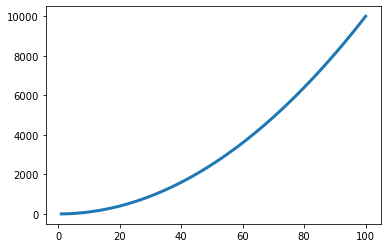

In [15]:
x = np.linspace(1, 100, 100, dtype=np.uint16)

plt.plot(x, x**2, linewidth=3.0)

#### With Line2D setter methods
---

`plot` returns a tuple of `Line2D` objects. You can call setter methods on those objects to set their properties.

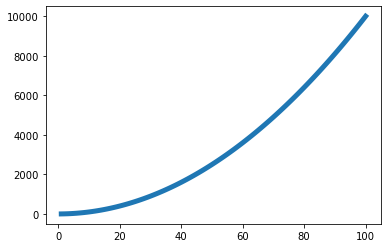

In [16]:
x = np.linspace(1, 100, 100, dtype=np.uint16)

line, = plt.plot(x, x**2)
line.set_linewidth(5.0)

#### With `pyplot.setp`
---

`pyplot.setp` (“set property”) lets you set a bunch of properties on one or more (tuple) lines with one function call.

[None, None]

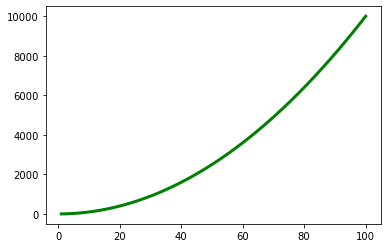

In [17]:
x = np.linspace(1, 100, 100, dtype=np.uint16)

lines = plt.plot(x, x**2)
plt.setp(lines, color='g', linewidth=3.0)


List settable line properties:

In [18]:
plt.setp(lines)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: colo

### Working with multiple figures and axes
---

- `gca`: “get current axes”
- `gcf`: “get current figure”

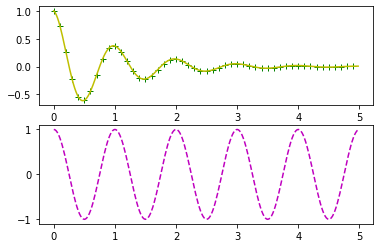

In [19]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'g+', t2, f(t2), 'y')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'm--')

plt.show()

Let’s create multiple figures at once. We’ll do this by passing a unique identifier integer into `pyplot.figure`.

<ipython-input-27-7d5c178dba54>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)             # make subplot(211) in figure1 current


Text(0.5, 1.0, 'Easy as 1, 2, 3')

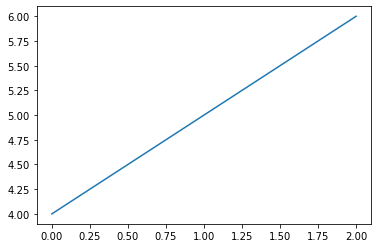

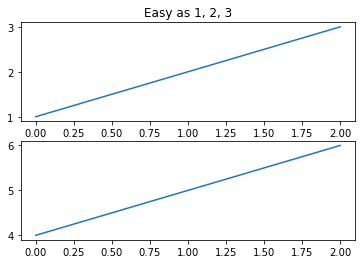

In [27]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

## Working with text
---

### Let’s plot a histogram, shall we?

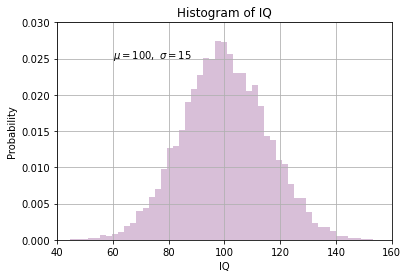

In [48]:
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
plt.hist(x, bins=50, density=True, facecolor='thistle')

plt.xlabel('IQ')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, 0.025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### Let’s annotate!

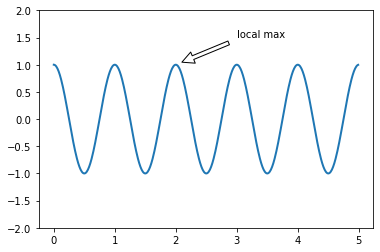

In [64]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5), 
             arrowprops=dict(facecolor='white', shrink=0.1),
            )
plt.ylim(-2, 2)
plt.show()

## Logarithmic and other nonlinear axes
---

Change the scale of axis like this: `plt.yscale('log')` or `plt.yscale('linear')`.

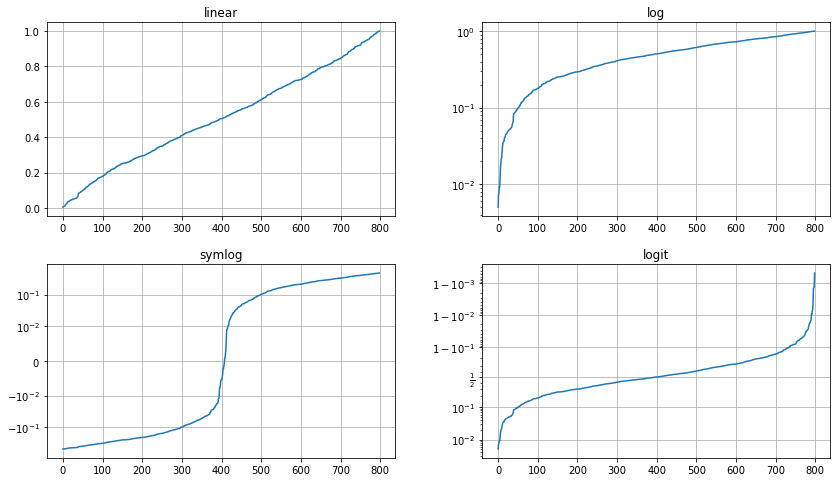

In [75]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(figsize=(12.8, 7.2))

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.25)

plt.show()